# Statistical Modeling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import os
os.chdir('..')

d:\week-3\Insurance-data-Analysis-week-3\.week3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
insurance_data = pd.read_csv('./Data/MachineLearningRating_v3.txt',delimiter= "|")

C:\Users\hanad\AppData\Local\Temp\ipykernel_21308\1412629699.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance_data = pd.read_csv('./Data/MachineLearningRating_v3.txt',delimiter= "|")


In [3]:
from scripts.statical_modeling import feature_engineering

df_with_new_features = feature_engineering(insurance_data)

# Check the new features
print(df_with_new_features[['VehicleAge', 'ClaimsToPremiumRatio', 'VehiclePowerIndex', 'InsuranceTenureMonths', 'IsHighRiskVehicle', 'IsHighRiskRegion']].head())


   VehicleAge  ClaimsToPremiumRatio  VehiclePowerIndex  InsuranceTenureMonths  \
0          20                   0.0       56268.239553             119.766667   
1          20                   0.0       56268.239553             117.733333   
2          20                   0.0       56268.239553             115.700000   
3          20                   0.0       56268.239553             117.733333   
4          20                   0.0       56268.239553             115.700000   

   IsHighRiskVehicle  IsHighRiskRegion  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  0                 0  
4                  0                 0  


In [4]:
from scripts.statical_modeling import encode_categorical_data

# Call the function to encode the categorical data
encoded_data = encode_categorical_data(insurance_data)

# Check the first few rows after encoding
print(encoded_data.head())


   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

   MaritalStatus  Gender  PostalCode      mmcode  VehicleType  \
0              1       2        1459  44069150.0            4   
1              1       2        1459  44069150.0            4   
2              1       2        1459  44069150.0            4   
3              1       2        1459  44069150.0            4   
4              1       2        1459  44069150.0            4   

   RegistrationYear  ...  Product_Mobility Metered Taxis: Monthly  \
0              2004  ...                                     True   
1              2004  ...                          

In [5]:
from scripts.statical_modeling import train_test_split_data,clean_data_for_modeling,convert_datetime_to_numeric,clean_data_for_modeling
# Convert 'TransactionMonth' or other datetime columns to numeric features
cleaned_data2=encoded_data['TransactionYear'] = pd.to_datetime(encoded_data['TransactionMonth']).dt.year
cleaned_data2=encoded_data['TransactionMonthNum'] = pd.to_datetime(encoded_data['TransactionMonth']).dt.month

# Drop the original datetime column
encoded_data2 = encoded_data.drop(columns=['TransactionMonth'])
cleaned_data2 = clean_data_for_modeling(encoded_data)
cleaned_data2 = clean_data_for_modeling(encoded_data)


encoded_data2 = convert_datetime_to_numeric(encoded_data)
# Assuming your target column is 'TotalPremium' (or another column you're predicting)
target_column = 'TotalPremium'

# Perform train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split_data(cleaned_data2, target_column, test_size=0.3)

# Check the shapes to make sure the split is done correctly
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

d:\week-3\Insurance-data-Analysis-week-3\scripts\statical_modeling.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
d:\week-3\Insurance-data-Analysis-week-3\scripts\statical_modeling.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

X_train shape: (700068, 678), X_test shape: (300030, 678)
y_train shape: (700068,), y_test shape: (300030,)


Linear Regresition Model Evaluation

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}, R^2: {r2}")

# Define a threshold to categorize predictions
threshold = y_test.mean()  # Example: mean of actual values as threshold

# Binarize predictions and actual values
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


d:\week-3\Insurance-data-Analysis-week-3\.week3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['VehicleIntroDate' 'NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\week-3\Insurance-data-Analysis-week-3\.week3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['VehicleIntroDate' 'NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Linear Regression MSE: 656458.2600366067, R^2: -11.377772932110743
Accuracy: 0.8464320234643202
Precision: 0.6105277643982661
Recall: 0.7139592519875116
F1 Score: 0.6582049360919268


Decision Tree Model Evaluation

In [7]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

# --- Regression with DecisionTreeRegressor ---
# Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)  # Adjust max_depth as needed
regressor.fit(X_train, y_train)

# Evaluate the regression model
y_pred_reg = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# print("Regression Results:")
print(f"Decision Tree MSE: {mse}")
print(f"Decision Tree R^2: {r2}")

# --- Classification with DecisionTreeClassifier ---
# Convert continuous target to discrete categories
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust n_bins as needed
y_train_binned = binner.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_binned = binner.transform(y_test.to_numpy().reshape(-1, 1)).ravel()

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=42)
classifier.fit(X_train, y_train_binned)

# Predict and evaluate classification model
y_pred_class = classifier.predict(X_test)

# Classification metrics
accuracy = accuracy_score(y_test_binned, y_pred_class)
precision = precision_score(y_test_binned, y_pred_class, average='weighted')
recall = recall_score(y_test_binned, y_pred_class, average='weighted')
f1 = f1_score(y_test_binned, y_pred_class, average='weighted')

print("\nClassification Results:")
print(f"Decision Tree Classification Accuracy: {accuracy}")
print(f"Decision Tree Classification Precision: {precision}")
print(f"Decision Tree Classification Recall: {recall}")
print(f"Decision Tree Classification F1 Score: {f1}")



Decision Tree MSE: 21838.957381856835
Decision Tree R^2: 0.5882180604573494

Classification Results:
Decision Tree Classification Accuracy: 0.9999966669999667
Decision Tree Classification Precision: 0.9999977779999777
Decision Tree Classification Recall: 0.9999966669999667
Decision Tree Classification F1 Score: 0.9999970002971927


Random Forests Model Evaluation

In [8]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scripts.statical_modeling import train_random_forest, evaluate_model
from sklearn.preprocessing import KBinsDiscretizer

# Train Random Forest
forest_model = train_random_forest(X_train, y_train, n_estimators=3, max_depth=10)

# Evaluate Regression Metrics
mse, r2 = evaluate_model(forest_model, X_test, y_test)
print(f"Random Forest MSE: {mse}, R^2: {r2}")

# Convert y_test and predictions to NumPy arrays for reshaping
y_test_array = y_test.to_numpy().reshape(-1, 1)  # Convert Series to NumPy and reshape
y_pred_array = forest_model.predict(X_test).reshape(-1, 1)  # Predictions reshaped

# Binning continuous targets into categories for classification metrics
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust n_bins as needed
y_test_binned = binner.fit_transform(y_test_array).ravel()
y_pred_binned = binner.transform(y_pred_array).ravel()

# Evaluate Classification Metrics
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision = precision_score(y_test_binned, y_pred_binned, average='weighted')
recall = recall_score(y_test_binned, y_pred_binned, average='weighted')
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f"Random Forest Classification Accuracy: {accuracy}")
print(f"Random Forest Classification Precision: {precision}")
print(f"Random Forest Classification Recall: {recall}")
print(f"Random Forest Classification F1 Score: {f1}")






Random Forest MSE: 16847.885670255095, R^2: 0.6823266368817555
Random Forest Classification Accuracy: 0.9999966669999667
Random Forest Classification Precision: 0.9999977779999777
Random Forest Classification Recall: 0.9999966669999667
Random Forest Classification F1 Score: 0.9999970002971927


XGBoost Model Evaluation

In [9]:

from scripts.statical_modeling import train_xgboost, evaluate_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model
xgb_model = train_xgboost(X_train, y_train)

# Evaluate Regression Metrics
mse, r2 = evaluate_model(xgb_model, X_test, y_test)
print(f"XGBoost MSE: {mse}, R^2: {r2}")

# Convert y_test and predictions to NumPy arrays for reshaping
y_test_array = y_test.to_numpy().reshape(-1, 1)  # Convert Series to NumPy and reshape
y_pred_array = xgb_model.predict(X_test).reshape(-1, 1)  # Predictions reshaped

# Binning continuous targets into categories for classification metrics
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust n_bins as needed
y_test_binned = binner.fit_transform(y_test_array).ravel()
y_pred_binned = binner.transform(y_pred_array).ravel()

# Evaluate Classification Metrics
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision = precision_score(y_test_binned, y_pred_binned, average='weighted')
recall = recall_score(y_test_binned, y_pred_binned, average='weighted')
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f"XGBoost Classification Accuracy: {accuracy}")
print(f"XGBoost Classification Precision: {precision}")
print(f"XGBoost Classification Recall: {recall}")
print(f"XGBoost Classification F1 Score: {f1}")




XGBoost MSE: 30937.90478670576, R^2: 0.4166539081650804
XGBoost Classification Accuracy: 0.9999833349998334
XGBoost Classification Precision: 0.9999922229999223
XGBoost Classification Recall: 0.9999833349998334
XGBoost Classification F1 Score: 0.9999876678748812


Feature Importance Analysis 

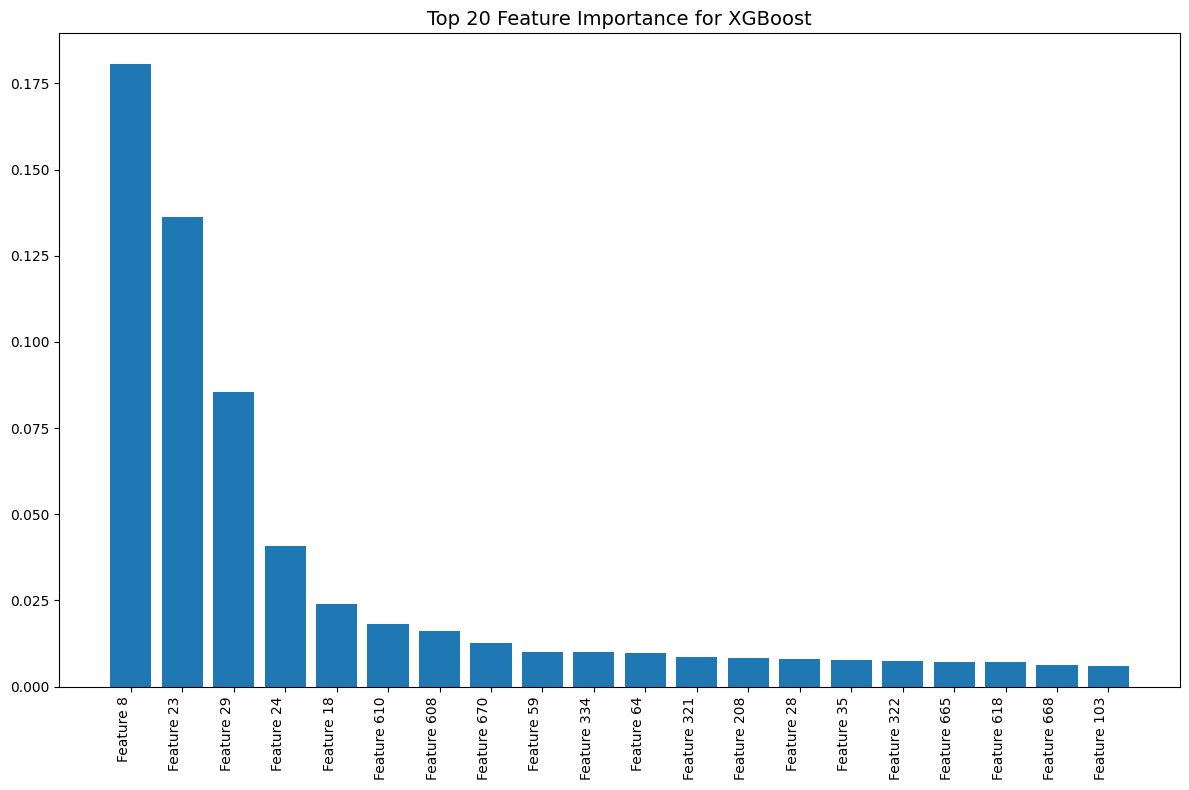

In [34]:

import matplotlib.pyplot as plt
from scripts.statical_modeling import plot_feature_importance

# Manually define feature names
feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

# If X_train is a NumPy array, convert it to a DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Feature Importance for XGBoost
plot_feature_importance(xgb_model, X_train_df.columns, "XGBoost")
plt.show()



